In [ ]:

# IMPORT YOUR KAGGLE DATA SOURCES

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'drowsiness-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F896350%2F1520586%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240403%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240403T090310Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2f93cbf0326d4ef9c15145b5112eb229a5b1dbe32abffcc32e13df1136c686790a11907bfa8177968aa8167ca68a6a4d6024ef2475ff10f604be0cd8171bddc4a28ee8bd1925cf0dc5c69a37c28d8173c442903f8fb46fe87b7bd1b0a3522ee58b36e16dd51f8eed36904e5480f031c28776a9531c391341a63bdaa1b53f3be35f918184e23111a61da379f17013a60d170a8050401cfea635cfe69e27271fdea114ba7ff2f2578e44d9323314a4a6fb3dedd603ae9ba415264e0d8712abbe4893e75bec6e56d74c54fe11aa548fa8d1fcb653dfbfa4524b7465c7ec8d867dcd9bcf4463cf63ef9d329f107cd01a155d487a0aab6e564989ac20d686d649a617,drowsiness-image-sample:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2880012%2F4965741%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240403%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240403T090310Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D23e2b30a7ca484ab5598f717f4bef5adac4fc4832f98b76a52bf1703465743d5ad7b910d2f678155a6d4742ebd7a5a19c7ccbddb5a3c36e01f3d665cfb87bb1136173c413432113b46b21e06833ac93b3ef880f47adb256c67f3c7230f88e25b7ff77449b77990cd6d903411474c5bacd6bd8fd7d9d073872b6f568c6a1074f947906c15bf8b482fc702e53bb5ee934c551cd7d6e21ff1c8dfc817d4f20cc863d178182362f9f0bf8565180ea41f1dea776b87bc883359625c2e3c6a852f70db432817ac2ce9979e38829bf68d8cfc9ef9722a73ffcfc7f2e9d3514c6acd8b74edc215e2e1a3cf691170cd4da74dd7a8a8c18594570fc582ca3967cbf4b97cac'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 168803305 bytes downloaded
Downloaded and uncompressed: drowsiness-dataset
[==================================================] 25869 bytes downloaded
Downloaded and uncompressed: drowsiness-image-sample
Data source import complete.


In [ ]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Building CNN Model:

In [ ]:
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
tensorflow.config.list_physical_devices('GPU')

[]

In [ ]:
labels = os.listdir("../input/drowsiness-dataset/train")

In [ ]:
labels

['yawn', 'no_yawn', 'Closed', 'Open']

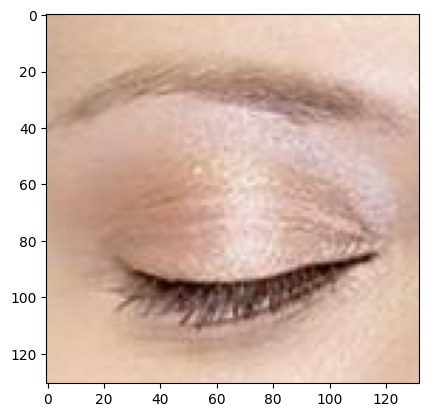

In [ ]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Closed/_2.jpg"))

In [ ]:
a = plt.imread("../input/drowsiness-dataset/train/yawn/10.jpg")

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]], dtype=uint8)
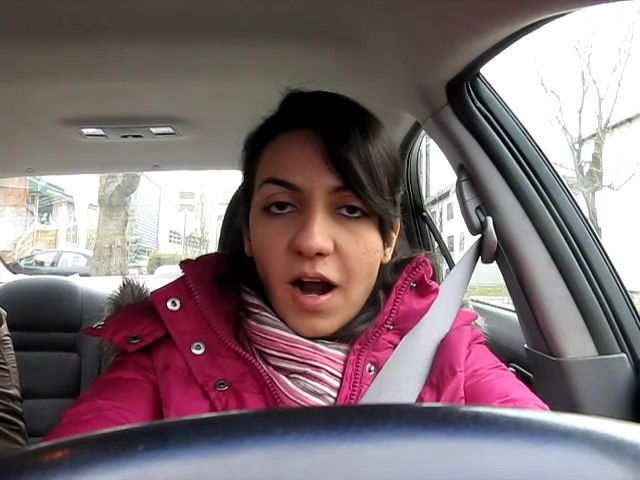

In [ ]:
a

In [ ]:
a.shape

(480, 640, 3)

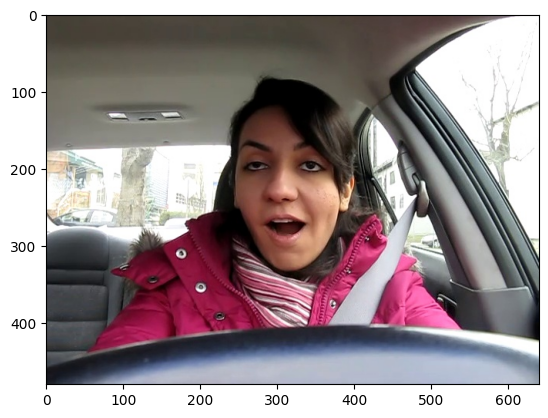

In [ ]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/yawn/5.jpg"))

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [ ]:
train_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [ ]:
validation_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_data = test_data_gen.flow_from_directory("../input/drowsiness-dataset/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [ ]:
train_data

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
model.build(input_shape=(80, 80, 3))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [ ]:
validation_steps = len(test_data)
validation_steps

363

In [ ]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/55
291/291 [==============================] - 260s 885ms/step - loss: 0.7662 - accuracy: 0.6389 - val_loss: 0.4534 - val_accuracy: 0.7652
Epoch 2/55
291/291 [==============================] - 266s 914ms/step - loss: 0.4256 - accuracy: 0.7893 - val_loss: 0.4017 - val_accuracy: 0.7928
Epoch 3/55
291/291 [==============================] - 272s 935ms/step - loss: 0.3806 - accuracy: 0.8109 - val_loss: 0.3360 - val_accuracy: 0.8279
Epoch 4/55
291/291 [==============================] - 277s 952ms/step - loss: 0.3369 - accuracy: 0.8367 - val_loss: 0.3311 - val_accuracy: 0.8400
Epoch 5/55
291/291 [==============================] - 270s 929ms/step - loss: 0.2936 - accuracy: 0.8660 - val_loss: 0.2853 - val_accuracy: 0.8628
Epoch 6/55
291/291 [==============================] - 267s 917ms/step - loss: 0.2943 - accuracy: 0.8733 - val_loss: 0.2570 - val_accuracy: 0.8776
Epoch 7/55
291/291 [==============================] - 270s 928ms/step - loss: 0.2384 - accuracy: 0.8940 - val_loss: 0.2528 -

In [ ]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

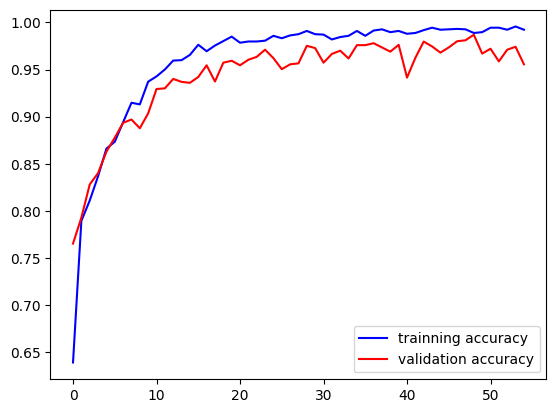

In [ ]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

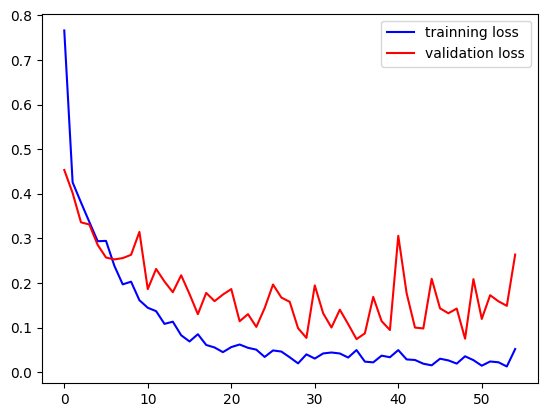

In [ ]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
model.save("drowiness.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("drowiness.model")

# Drowsiness Main

In [ ]:
#pip install pillow

In [ ]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model('drowiness.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

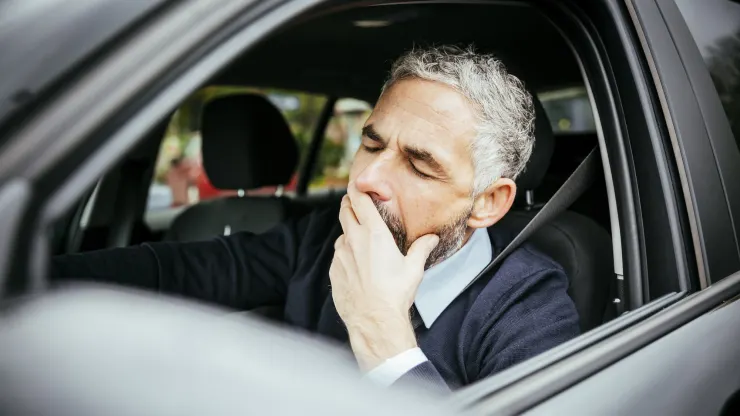

In [ ]:
Image.open("/kaggle/input/drowsiness-image-sample/121.jpg")

In [ ]:
image_size = (80, 80)

In [ ]:
img = Image.open("/kaggle/input/drowsiness-image-sample/121.jpg").resize(image_size)

In [ ]:
img = np.array(img)/255.0

In [ ]:
img.shape

(80, 80, 3)

In [ ]:
result = model.predict(img[np.newaxis, ...])

1/1 [==============================] - 0s 149ms/step


In [ ]:
result.shape

(1, 4)

In [ ]:
result

array([[5.7906390e-04, 9.2274997e-09, 1.7416872e-04, 9.9924684e-01]],
      dtype=float32)

In [ ]:
predicted_label_index = np.argmax(result)

In [ ]:
if (predicted_label_index==0):
    print('Closed eyes')

elif predicted_label_index==1:
    print('No Yawn Detected')

elif predicted_label_index==2:
    print('Open eyes')

elif predicted_label_index==3:
    print('Yawn Detected')

Yawn Detected


In [ ]:
if (predicted_label_index==0) & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==3):
    print('Drowsiness Detected')

elif predicted_label_index==2 & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==1) & (predicted_label_index==2):
    print('No Drowsiness Detected')

elif predicted_label_index==1:
    print('No Drowsiness Detected')

Drowsiness Detected
